# Black Friday Sales Prediction

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
import pandas as pd


In [2]:
b_friday=pd.read_csv("blackfriday.csv")

In [4]:
b_friday


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


<Axes: >

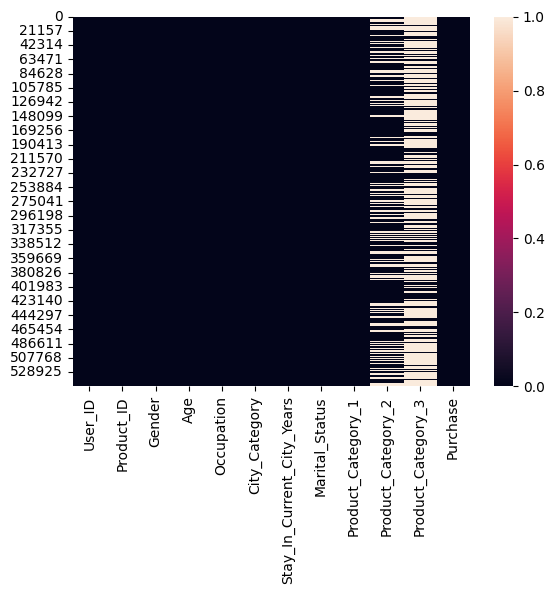

In [5]:
sb.heatmap(b_friday.isnull())

In [6]:
b_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
b_friday['Gender'].replace(['M','F'],[1,0],inplace=True)

In [8]:
b_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


In [9]:
b_friday['Gender'].value_counts()

Gender
1    414259
0    135809
Name: count, dtype: int64

In [10]:
b_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
b_friday.shape

(550068, 12)

In [12]:
b_friday.describe()

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,0.753105,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,0.431205,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,1.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,1.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,1.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,1.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
b_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


In [14]:
b_friday.describe()

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,0.753105,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,0.431205,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,1.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,1.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,1.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,1.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
b_friday=b_friday.fillna(0)

In [16]:
b_friday[['Product_Category_2']]=b_friday[['Product_Category_2']].astype(int)
b_friday[['Product_Category_3']]=b_friday[['Product_Category_3']].astype(int)

In [17]:
b_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [18]:
b_friday=b_friday.drop(['User_ID','Product_ID'],axis=1)

In [19]:
b_friday.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,0,0,8370
1,0,0-17,10,A,2,0,1,6,14,15200
2,0,0-17,10,A,2,0,12,0,0,1422
3,0,0-17,10,A,2,0,12,14,0,1057
4,1,55+,16,C,4+,0,8,0,0,7969


<Axes: >

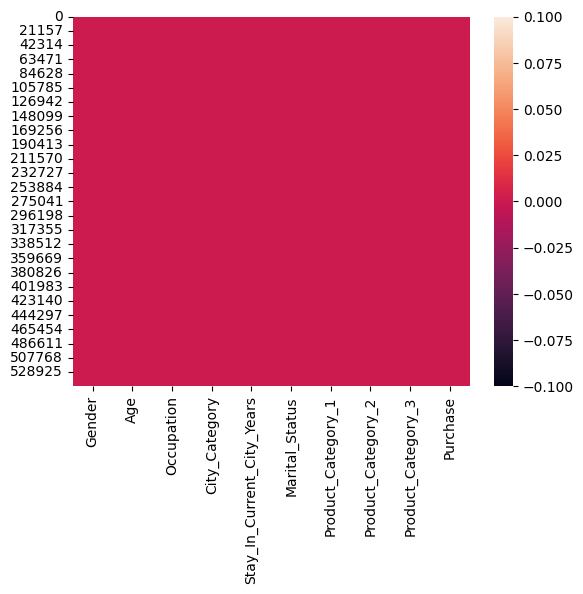

In [20]:
sb.heatmap(b_friday.isnull())

In [31]:
b_friday.isnull().sum()/b_friday.shape[0]*100

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

# Data Analysis

C:\Users\sai abhinav\AppData\Local\Temp\ipykernel_34476\2367348530.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(b_friday["Purchase"])


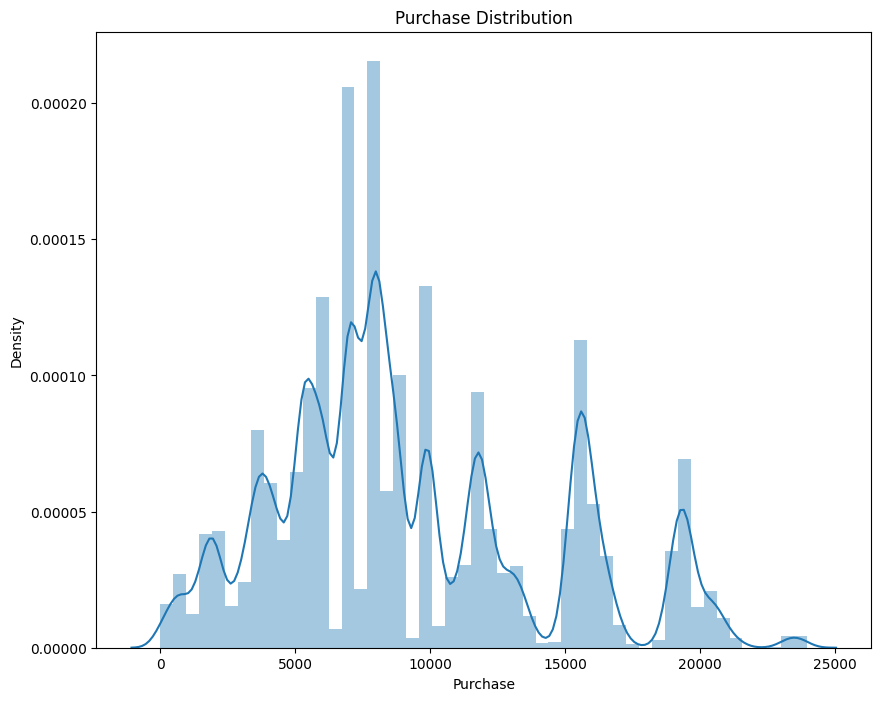

In [21]:
mp.figure(figsize=(10,8))
sb.distplot(b_friday["Purchase"])
mp.title("Purchase Distribution")
mp.show()

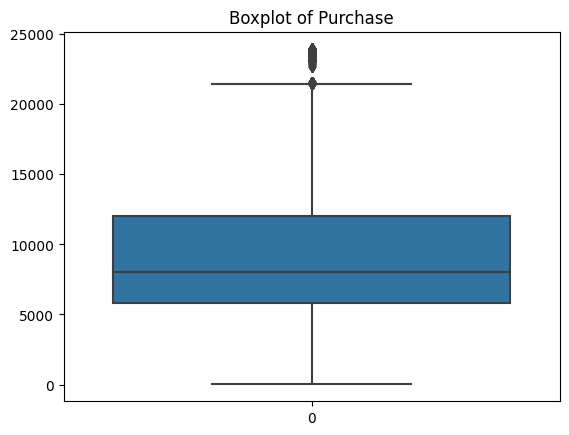

In [33]:
sb.boxplot(b_friday["Purchase"])
mp.title("Boxplot of Purchase")
mp.show()

In [34]:
b_friday["Purchase"].skew()

0.6001400037087128

In [35]:
b_friday["Purchase"].kurtosis()

-0.3383775655851702

In [36]:
b_friday["Purchase"].describe()


count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

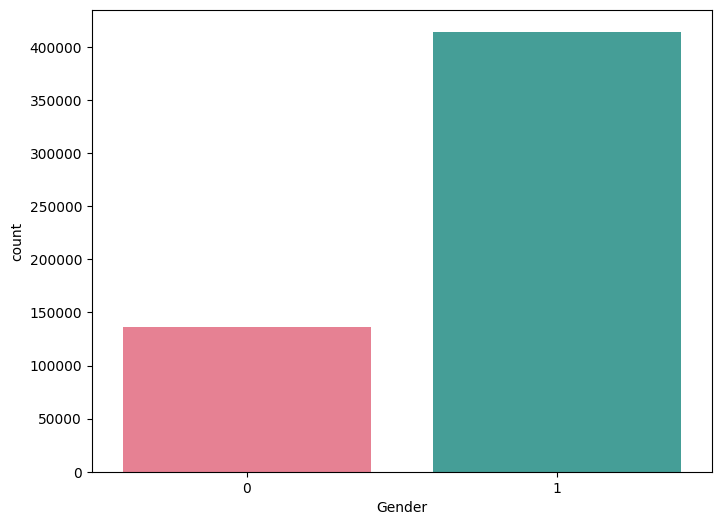

In [22]:
mp.figure(figsize=(8,6))
sb.countplot(x ='Gender', data = b_friday, palette ='husl')
mp.show()

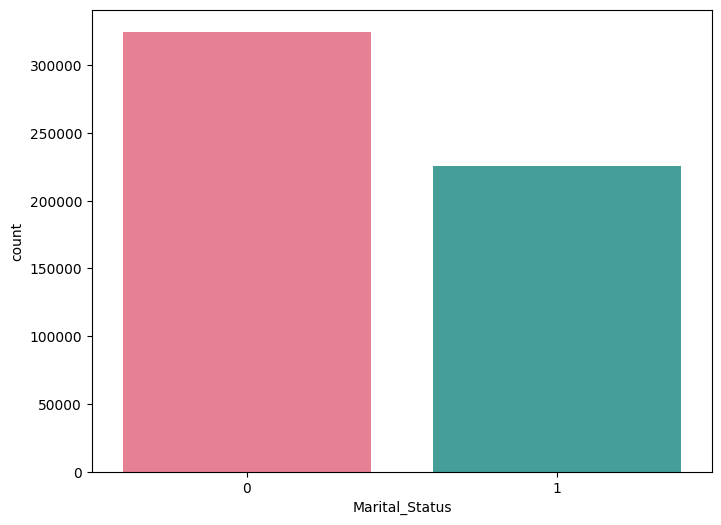

In [23]:
mp.figure(figsize=(8,6))
sb.countplot(x ='Marital_Status', data = b_friday, palette ='husl')
mp.show()

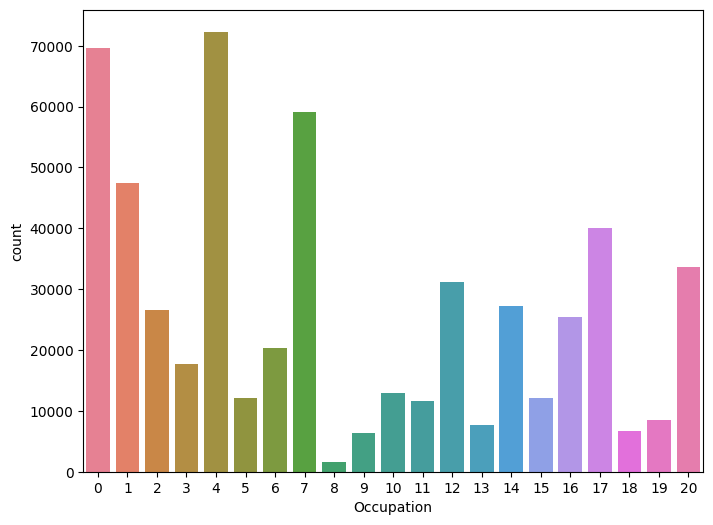

In [24]:
mp.figure(figsize=(8,6))
sb.countplot(x ='Occupation', data = b_friday, palette ='husl')
mp.show()

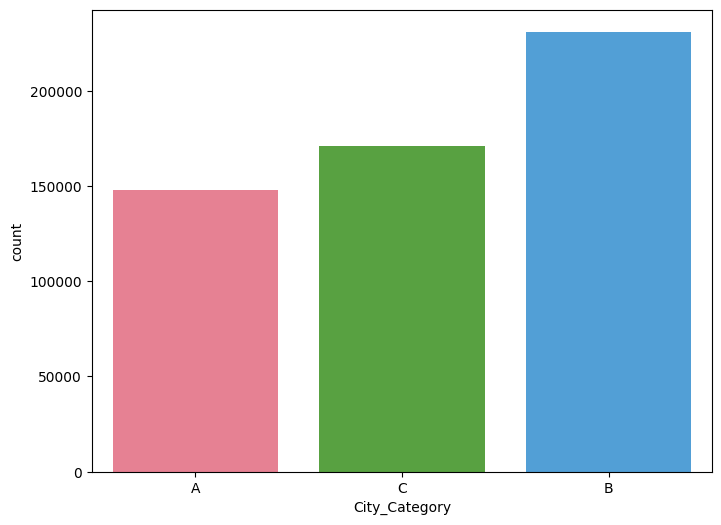

In [25]:
mp.figure(figsize=(8,6))
sb.countplot(x ='City_Category', data = b_friday, palette ='husl')
mp.show()

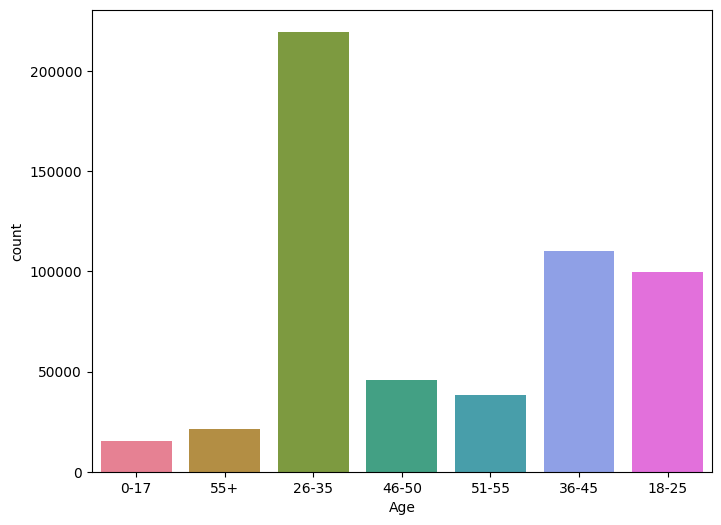

In [26]:
mp.figure(figsize=(8,6))
sb.countplot(x ='Age', data = b_friday, palette ='husl')
mp.show()

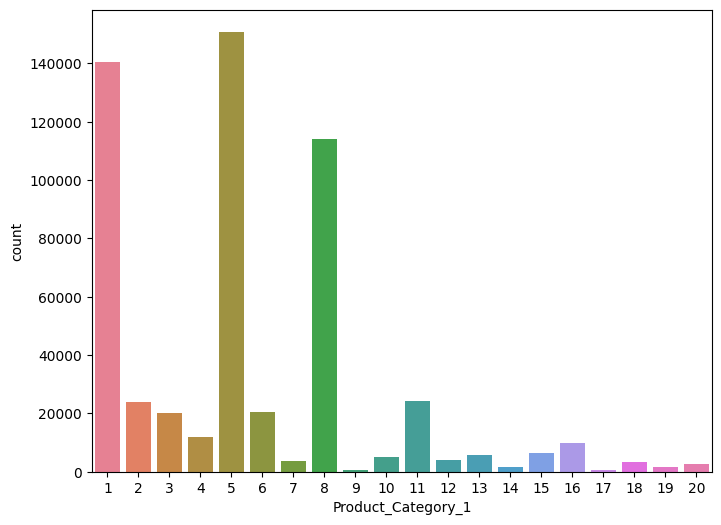

In [27]:
mp.figure(figsize=(8,6))
sb.countplot(x ='Product_Category_1', data = b_friday, palette ='husl')
mp.show()

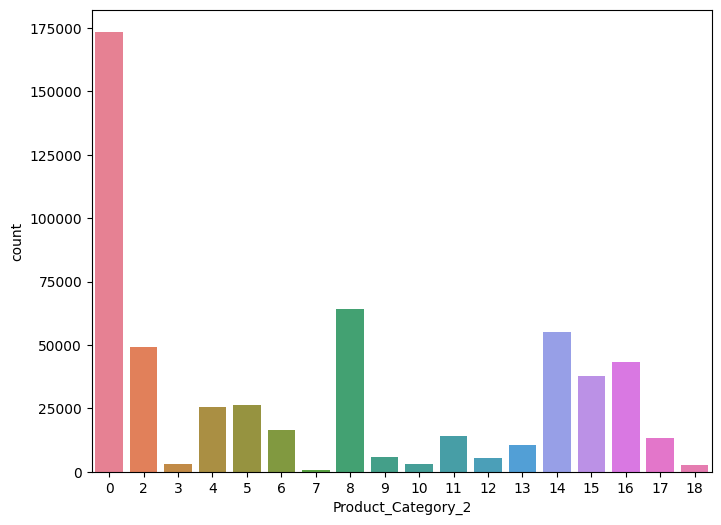

In [28]:
mp.figure(figsize=(8,6))
sb.countplot(x ='Product_Category_2', data = b_friday, palette ='husl')
mp.show()

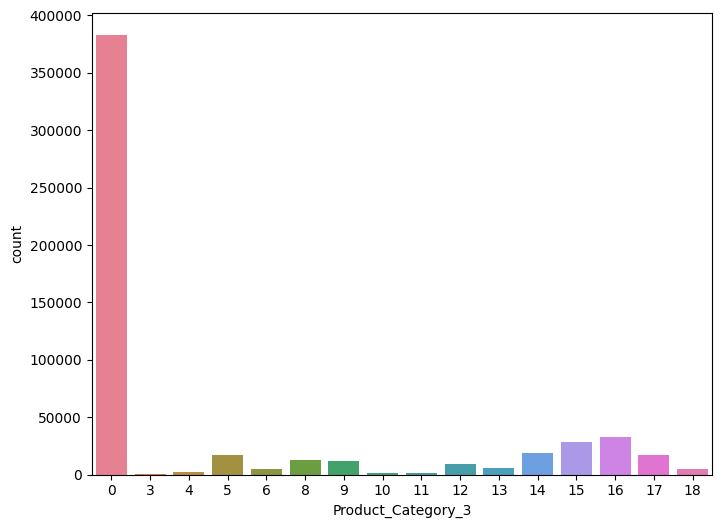

In [29]:
mp.figure(figsize=(8,6))
sb.countplot(x ='Product_Category_3', data = b_friday, palette ='husl')
mp.show()

In [43]:
df=b_friday.copy()

In [56]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['Gender'] = lr.fit_transform(df['Gender'])
df['Age'] = lr.fit_transform(df['Age'])
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [57]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [58]:
df.corr()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
Gender,1.000000,-0.004262,0.117291,-0.004515,-0.011603,-0.045594,-0.000954,0.036146,0.060346,0.016094,-0.030400,0.008806,-0.011080,0.027125
Age,-0.004262,1.000000,0.091463,0.123079,0.311738,0.061197,0.018770,-0.007422,0.015839,-0.022994,0.039493,-0.018286,-0.012848,0.002666
Occupation,0.117291,0.091463,1.000000,0.034479,0.024280,-0.007618,0.006712,0.012269,0.020833,-0.026055,-0.002092,-0.012716,0.025974,0.013905
City_Category,-0.004515,0.123079,0.034479,1.000000,0.039790,-0.014364,0.016003,0.035525,0.061914,-0.040678,0.017688,0.009208,-0.006805,0.012357
Marital_Status,-0.011603,0.311738,0.024280,0.039790,1.000000,0.019888,0.001099,-0.004629,-0.000463,-0.010673,0.028831,-0.006474,-0.013635,-0.006782
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,0.019888,1.000000,-0.067877,-0.385534,-0.343703,0.004576,0.006121,-0.007000,-0.010995,0.006624
Product_Category_2,-0.000954,0.018770,0.006712,0.016003,0.001099,-0.067877,1.000000,0.094750,0.052288,-0.002925,0.001557,0.000494,-0.000637,0.000846
Product_Category_3,0.036146,-0.007422,0.012269,0.035525,-0.004629,-0.385534,0.094750,1.000000,0.288501,-0.001931,-0.003403,0.004742,0.003398,-0.002331
Purchase,0.060346,0.015839,0.020833,0.061914,-0.000463,-0.343703,0.052288,0.288501,1.000000,-0.006605,-0.002030,0.005358,0.002090,0.000988
Stay_In_Current_City_Years_0,0.016094,-0.022994,-0.026055,-0.040678,-0.010673,0.004576,-0.002925,-0.001931,-0.006605,1.000000,-0.291711,-0.188509,-0.181025,-0.168752


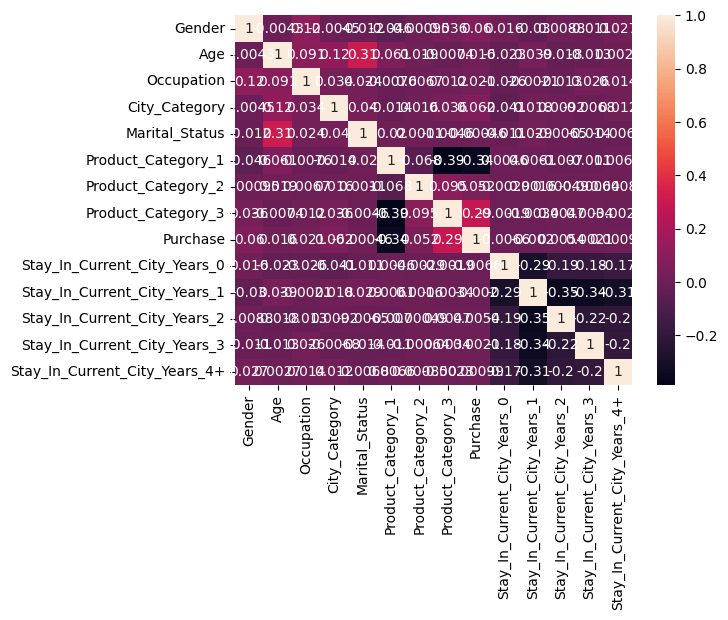

In [59]:
sb.heatmap(df.corr(),annot=True)
mp.show()

In [60]:
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0,0,8370,False,False,True,False,False
1,0,0,10,0,0,1,6,14,15200,False,False,True,False,False
2,0,0,10,0,0,12,0,0,1422,False,False,True,False,False
3,0,0,10,0,0,12,14,0,1057,False,False,True,False,False
4,1,6,16,2,0,8,0,0,7969,False,False,False,False,True


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         550068 non-null  int64
 1   Age                            550068 non-null  int32
 2   Occupation                     550068 non-null  int64
 3   City_Category                  550068 non-null  int32
 4   Marital_Status                 550068 non-null  int64
 5   Product_Category_1             550068 non-null  int64
 6   Product_Category_2             550068 non-null  int32
 7   Product_Category_3             550068 non-null  int32
 8   Purchase                       550068 non-null  int64
 9   Stay_In_Current_City_Years_0   550068 non-null  bool 
 10  Stay_In_Current_City_Years_1   550068 non-null  bool 
 11  Stay_In_Current_City_Years_2   550068 non-null  bool 
 12  Stay_In_Current_City_Years_3   550068 non-null  bool 
 13 

In [62]:
X = df.drop("Purchase",axis=1)

In [63]:
y=df['Purchase']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
lr.intercept_

-82651811075406.97

In [68]:
lr.coef_

array([ 4.64716031e+02,  1.11410789e+02,  5.10296893e+00,  3.14384222e+02,
       -5.80039339e+01, -3.48460943e+02,  1.29821241e+01,  1.43493630e+02,
        8.26518111e+13,  8.26518111e+13,  8.26518111e+13,  8.26518111e+13,
        8.26518111e+13])

In [69]:
y_pred = lr.predict(X_test)

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [71]:
mean_absolute_error(y_test, y_pred)

3532.026374768211

In [72]:
mean_squared_error(y_test, y_pred)

21397753.52393538

In [73]:
r2_score(y_test, y_pred)

0.1519333984711001

In [74]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.770587041188


# DecisionTreeRegressor

In [75]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  


In [76]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [77]:
dt_y_pred = regressor.predict(X_test)

In [78]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [79]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [80]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [81]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3361.633452177241


# Random Forest Regessor

In [86]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [100]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [101]:
rf_y_pred = RFregressor.predict(X_test)

In [102]:
mean_absolute_error(y_test, rf_y_pred)

2222.049109204734

In [103]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [104]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [98]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3051.35541573242


# XGBoost Regressor

In [105]:
!pip install xgboost

     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.4/70.9 MB 8.1 MB/s eta 0:00:09
     ---------------------------------------- 0.6/70.9 MB 8.8 MB/s eta 0:00:09
     ---------------------------------------- 0.6/70.9 MB 8.8 MB/s eta 0:00:09
     ---------------------------------------- 0.6/70.9 MB 8.8 MB/s eta 0:00:09
     ---------------------------------------- 0.6/70.9 MB 8.8 MB/s eta 0:00:09
     ---------------------------------------- 0.6/70.9 MB 8.8 MB/s eta 0:00:09
     ---------------------------------------- 0.6/70.9 MB 8.8 MB/s eta 0:00:09
     ---------------------------------------- 0.6/70.9 MB 8.8 MB/s eta 0:00:09
     ---------------------------------------- 0.6/70.9 MB 8.8 MB/s eta 0:00:09
     ---------------------------------------- 0.7/70.9 MB 1.5 MB/s eta 0:00:49
      --------------------------------------- 1.0/70.9 MB 1.9 MB/s eta 0:00:37
      --------------------------------------- 1.2/70.9 MB 2

In [106]:
from xgboost.sklearn import XGBRegressor

In [107]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [108]:
xgb_y_pred = xgb_reg.predict(X_test)

In [109]:
mean_absolute_error(y_test, xgb_y_pred)

2144.8588298827412

In [110]:
mean_squared_error(y_test, xgb_y_pred)

8268802.184348016

In [111]:
r2_score(y_test, xgb_y_pred)

0.67227891659979

In [112]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2875.5525007114747
